<a href="https://colab.research.google.com/github/RomanKunal/PythonLib/blob/main/HandlingCategoricaldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling missing categorical data


In [1]:
import pandas as pd
import numpy as np


In [4]:
data=pd.read_csv('/content/train_housing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

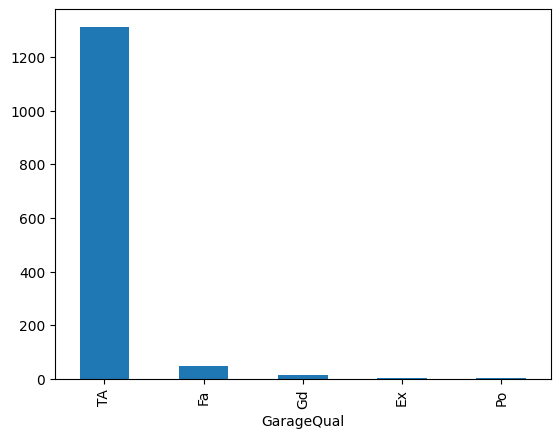

In [8]:
data['GarageQual'].value_counts().plot(kind='bar')

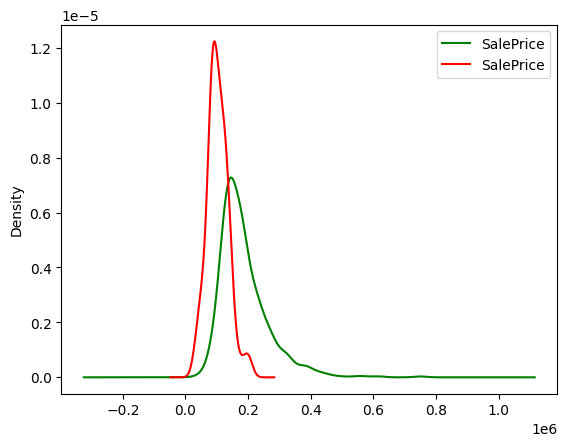

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='green')
data[data['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [11]:
data['GarageQual'].fillna('TA',inplace=True)

In [12]:
temp=data[data['GarageQual']=='TA']['SalePrice']

<Axes: ylabel='Density'>

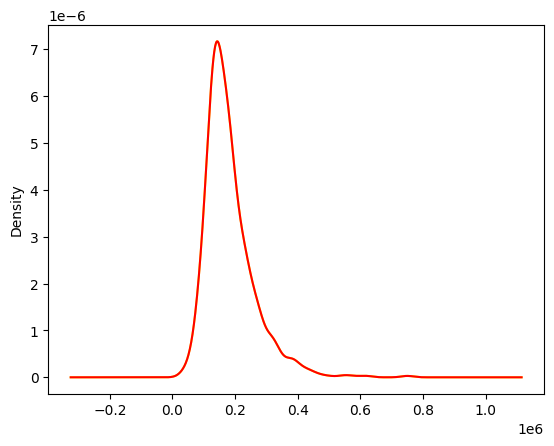

In [13]:
temp.plot(kind='kde',color='yellow')
data[data['GarageQual']=='TA']['SalePrice'].plot(kind='kde',color='red')


# Using Simple Imputer

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=['SalePrice']),data['SalePrice'],test_size=0.2)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)
imputer.statistics_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array(['Gd', 'TA'], dtype=object)

# Another way to manage the categorical data is putting constant word on missing place


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data=pd.read_csv('/content/train_housing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [18]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [19]:
data['GarageQual'].fillna('Missing',inplace=True)

Text(0, 0.5, 'Number of houses')

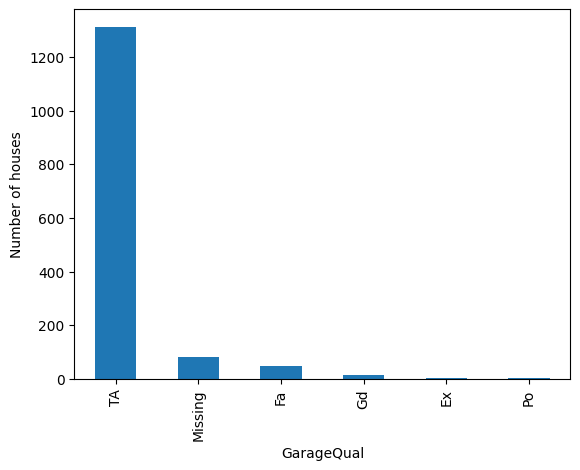

In [20]:
data['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')